<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JersonDavidPerezContreras/blob/main/Activity_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TECNOLOGICO DE MONTEREY





#Maestria en inteligencia artificial aplicada





##Ciencia y Analitica de datos


##Activity Semanal -- 7 Regresiones y K means



## Profesora:

María de la Paz Rico Fernández





# Presentado por: 

Jerson David Perez Contreras

A01793810

Liga Git: 

Ejerccio 1 

Costo en la industria de manufactura. 

Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.


In [82]:


##librereias

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform


# to make this notebook's output stable across runs
np.random.seed(42)

# Cargar Datos

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

df.head()




,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [83]:
##VARIABLES INDEPENDIENTES Y  DEPENDIENTES

X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [84]:
##Divide los datos del costo de manufactura. Utiliza la función train_test_split .

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [85]:
##Regresión Lineal.
##Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

regresion = LinearRegression(fit_intercept=True)
regresion.fit(X_train, y_train)

y_val = regresion.predict(X_test)

print('Modelo Y=', regresion.coef_,'X +', regresion.intercept_)

Modelo Y= [-5.98882699] X + 66.83650741226988


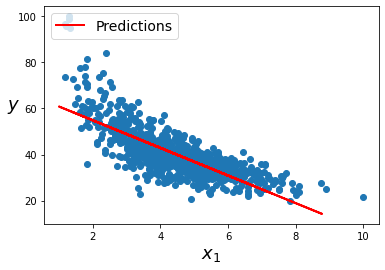

In [86]:
## VISUALIZACION
plt.scatter(X_train, y_train)
plt.plot(X_test, y_val, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [87]:
# los errores

MAES= []
R= []


print('MAE:', metrics.mean_absolute_error(y_test,y_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

#la r cuadrada
print(' r cuadrada:', r2_score(y_test,y_val))

MAES.append(metrics.mean_absolute_error(y_test,y_val))
R.append(r2_score(y_test,y_val))


MAE: 5.013587781954963
RMSE: 7.108963321847682
 r cuadrada: 0.6116251549562579


In [88]:
##Regresión Polinomial.
##Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)


print('Modelo Y=', lin_reg.coef_[0],'X +' , lin_reg.coef_[1],'X^2 +', regresion.intercept_)


Modelo Y= -16.406381017212386 X + 1.1313609537119216 X^2 + 66.83650741226988


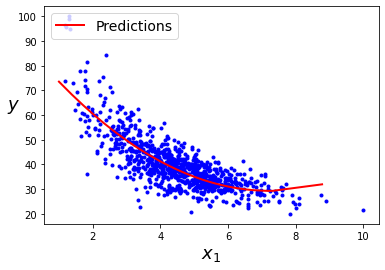

In [89]:
#VISUALISACION

orden = np.argsort(X_test.values.ravel()) 

X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X_train, y_train, "b.")
plt.plot(X_test.values.ravel()[orden] , y_new[orden] , "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [90]:
# los errores

print('MAE:', metrics.mean_absolute_error(y_test.values.ravel()[orden] , y_new[orden]))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test.values.ravel()[orden] ,y_new[orden])))

#la r cuadrada
print('r cuadrada',r2_score(y_test.values.ravel()[orden] , y_new[orden]))

MAES.append(metrics.mean_absolute_error(y_test.values.ravel()[orden] , y_new[orden]))
R.append(r2_score(y_test.values.ravel()[orden] , y_new[orden]))


MAE: 4.3833025759681075
RMSE 5.832771301068423
r cuadrada 0.7385501224942536


In [91]:
## Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

## lasso

lasso =  Lasso(alpha=5.0,fit_intercept=True)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Modelo Y =', lasso.coef_,'X +', lasso.intercept_)


Modelo Y = [-3.15572458] X + 54.16195119377413


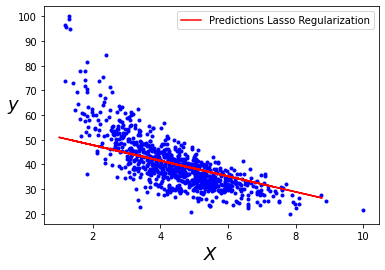

In [92]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "r-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [93]:
#errores
print('MAE:', metrics.mean_absolute_error(y_test, np.ravel(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred))))

# rcuadrado
print('r cuadrado',r2_score(y_test, np.ravel(y_pred)))

MAES.append( metrics.mean_absolute_error(y_test, np.ravel(y_pred)))
R.append(r2_score(y_test, np.ravel(y_pred)))


MAE: 5.681207654677401
RMSE: 8.409660991642687
r cuadrado 0.456505036516648


In [94]:
##RIDGE

ridge = Ridge(alpha=5.0,fit_intercept=True) 
ridge.fit(X_train, y_train)

y_val = ridge.predict(X_test)

print('Modelo Y =', ridge.coef_,'X +', ridge.intercept_)

Modelo Y = [-5.97003397] X + 66.75243237759665


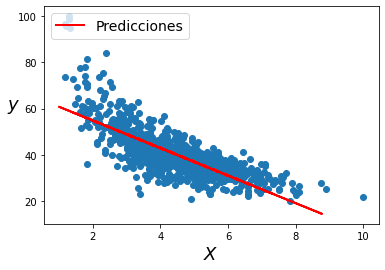

In [95]:
##GRAFICA

plt.scatter(X_train, y_train)
plt.plot(X_test, y_val, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [96]:
#ERRORES
print('MAE:', metrics.mean_absolute_error(y_test, np.ravel(y_val)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_val))))

# r cuadrado
print('r cuadrado',r2_score(y_test, np.ravel(y_val)))



MAES.append(metrics.mean_absolute_error(y_test, np.ravel(y_val)))
R.append(r2_score(y_test, np.ravel(y_val)))

MAE: 5.0162057389928325
RMSE: 7.1111119498200965
r cuadrado 0.6113903530239646


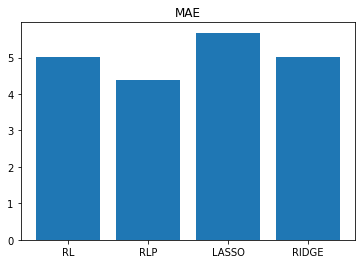

In [97]:
##Finalmente grafica :
##MAE (de los cuatro métodos)
##R2 (de los cuatro métodos)

#MAE

nombres=['RL', 'RLP','LASSO','RIDGE']

MAES

plt.bar(nombres, MAES)
plt.title("MAE")
plt.show()


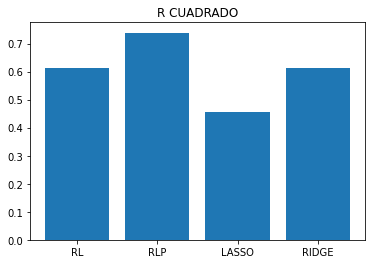

In [98]:
plt.bar(nombres, R)
plt.title("R CUADRADO")
plt.show()

#Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Dada las metricas de MAE Y R Cuadrado, el modelo polomial es el mas adecuado, debido a que tiene un menor error y su r2 es mayor a los demas modelos. la base se utilizo 80% de los datos para entrenamiento y 10% de validacion.
el mejor modelo se trabajo con 2 grados obtiendo asi un error de 4.32% siendo este el mejor modelo.

Como conclusion, siempre es importante evaluar varios metodos de prediccion y revisar sus paramentros, esto debido, dependiendo de los datos y el objetivo que se busca, cada uno de los modelos se puede adapatar mejor a cada situación.



#Notebook 2. K means. 

In [ ]:


! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [101]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [102]:
# IMPORTAR DATOS
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [103]:
## longitudes y latitudes

latlong=df[["latitude","longitude"]]

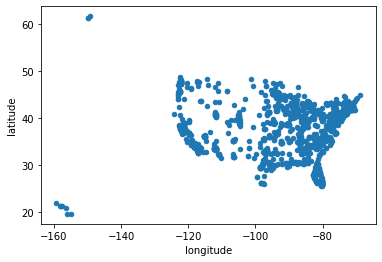

In [104]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [107]:
## librerias geograficas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [108]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [109]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [110]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


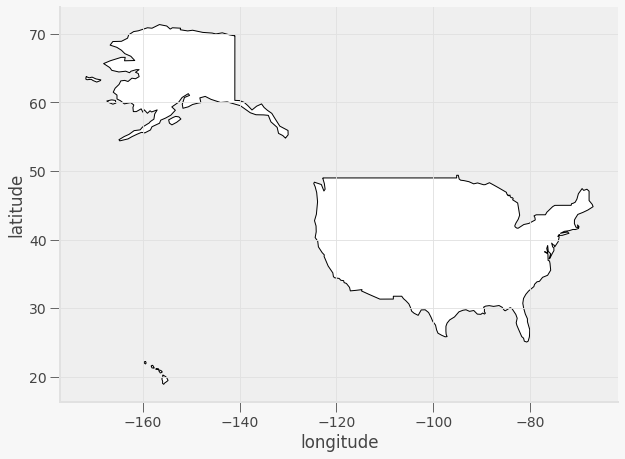

In [111]:
#MAPA
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

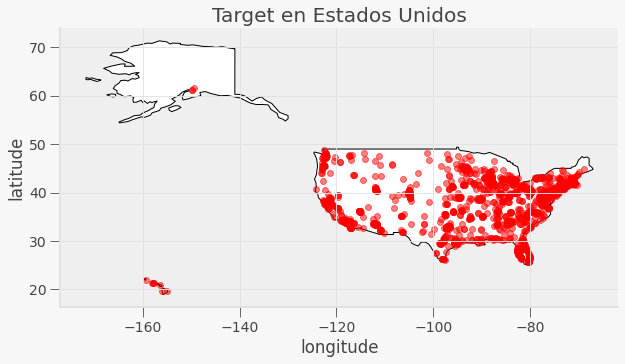

In [112]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()